In [1]:
import pandas as pd
import numpy as np


In [7]:
from google.colab import files
uploaded = files.upload()


Saving Assignment Data_ NPS Tracker_2025 - Sheet1.csv to Assignment Data_ NPS Tracker_2025 - Sheet1 (5).csv


In [11]:
df = pd.read_csv('/content/Assignment Data_ NPS Tracker_2025 - Sheet1 (1).csv')
df.head()


,Ticket No,Created Date,Created Time,Assigned To,Resolved Date,Resolved Time,Landing Folder,Disposition Folder Level 1,Disposition Folder Level 2,Phone,Email,Ticket All Remarks,Program Name,Issue 2 - NPS,NPS Rating,Status,Sub Status
0,75591735734,2025-08-23,18:16:02,Mike Chen,2025-08-30,17:21:01,Counselling Team - NPS,Counselling Team - NPS,Tech (NPS),9562254028,learner001@example.com,No code review feedback provided for assignmen...,Academy,Projects & Assignment Related Concern (NPS),6,Complete,Solved
1,75958260221,2025-09-02,17:43:46,David Wilson,2025-09-12,12:16:02,Counselling Team - NPS,Counselling Team - NPS,Program & Classroom (NPS),8564319318,learner002@example.com,No code review feedback provided for assignmen...,DSML,Projects & Assignment Related Concern (NPS),3,Complete,Solved
2,75838508549,2025-09-12,14:25:44,Lisa Rodriguez,NaN,NaN,Counselling Team - NPS,Counselling Team - NPS,Tech (NPS),9381183483,learner003@example.com,Assignment datasets have data quality issues b...,DevOps,Projects & Assignment Related Concern (NPS),6,Pending,In Progress
3,75988343096,2025-09-13,09:19:18,David Wilson,2025-09-16,18:36:19,Counselling Team - NPS,Counselling Team - NPS,Others (NPS),8846355528,learner004@example.com,Live sessions scheduled during US client calls...,DSML,Time Management Related Concerns (NPS),1,Complete,Solved
4,75500273738,2025-09-13,12:43:19,David Wilson,2025-09-21,11:42:05,Counselling Team - NPS,Counselling Team - NPS,Tech (NPS),7855256552,learner005@example.com,Told course would take 6 months but curriculum...,DevOps,False Promise By Sales Team (NPS),8,Complete,Solved


In [12]:
df.shape

(225, 17)

In [10]:
# Columns to audit for missing critical info
critical_cols = ['Created Date', 'Assigned To', 'Resolved Date', 'Status', 'Sub Status', 'Program Name']

# Count missing entries in these columns
missing_report = df[critical_cols].isnull().sum()
print("Missing values per critical column:\n", missing_report)

# Also check for 'empty strings' as missing
empty_report = (df[critical_cols] == '').sum()
print("Empty strings per critical column:\n", empty_report)


Missing values per critical column:
 Created Date      0
Assigned To       5
Resolved Date    67
Status            0
Sub Status        0
Program Name      0
dtype: int64
Empty strings per critical column:
 Created Date     0
Assigned To      0
Resolved Date    0
Status           0
Sub Status       0
Program Name     0
dtype: int64


In [13]:
# Duplicates by Ticket No (assuming it's unique)
duplicates = df[df.duplicated('Ticket No', keep=False)]
print("Duplicate Ticket No entries:\n", duplicates)
print(f"Total duplicate Ticket Nos: {duplicates.shape[0]}")


Duplicate Ticket No entries:
 Empty DataFrame
Columns: [Ticket No, Created Date, Created Time, Assigned To, Resolved Date, Resolved Time, Landing Folder, Disposition Folder Level 1, Disposition Folder Level 2, Phone, Email, Ticket All Remarks, Program Name, Issue 2 - NPS, NPS Rating, Status, Sub Status]
Index: []
Total duplicate Ticket Nos: 0


In [14]:
# Example check: Status == 'Complete' but Sub Status != 'Solved'
inconsistent = df[(df['Status'] == 'Complete') & (df['Sub Status'] != 'Solved')]
print("Complete tickets with sub-status not Solved:\n", inconsistent)

# Another example: Status == 'Pending' but Sub Status in ['Solved', 'Awaiting Action - Scaler/ Learner']
pending_solved = df[(df['Status'] == 'Pending') & (df['Sub Status'] == 'Solved')]
print("Pending status having sub-status as Solved:\n", pending_solved)


Complete tickets with sub-status not Solved:
        Ticket No Created Date Created Time   Assigned To Resolved Date  \
66   75513669678   2025-08-30     12:27:37   Jessica Kim           NaN   
84   75543247463   2025-08-23     09:22:34    Amit Patel    2025-09-03   
95   75533316990   2025-09-10     17:09:19  Priya Sharma    2025-09-13   
107  75517999418   2025-09-03     12:01:28    Amit Patel    2025-09-13   
149  75927215082   2025-09-14     18:50:15    Amit Patel    2025-09-20   
201  75765887237   2025-09-03     20:11:58    Amit Patel    2025-09-09   

    Resolved Time          Landing Folder Disposition Folder Level 1  \
66            NaN  Counselling Team - NPS     Counselling Team - NPS   
84       10:49:37  Counselling Team - NPS     Counselling Team - NPS   
95       15:32:58  Counselling Team - NPS     Counselling Team - NPS   
107      15:09:52  Counselling Team - NPS     Counselling Team - NPS   
149      11:25:20  Counselling Team - NPS     Counselling Team - NPS   
201

In [16]:
# Convert date columns to datetime
df['Created Date'] = pd.to_datetime(df['Created Date'])
df['Resolved Date'] = pd.to_datetime(df['Resolved Date'])

In [17]:
# Count frequency of issues (Issue 2 - NPS column assumed to contain issue types)
top_issues = df['Issue 2 - NPS'].value_counts().head(5)
print("Top 5 Issues by Frequency:\n", top_issues)


Top 5 Issues by Frequency:
 Issue 2 - NPS
Looking For Career Guidance (NPS)                     21
Applied for jobs but no satisfactory outcome (NPS)    19
Time Management Related Concerns (NPS)                18
False Promise By Sales Team (NPS)                     18
Projects & Assignment Related Concern (NPS)           18
Name: count, dtype: int64


In [18]:
# Count issue occurrences grouped by Program Name and Issue
issue_program_group = df.groupby(['Program Name', 'Issue 2 - NPS']).size().reset_index(name='count')

# Find issues common across multiple programs (count distinct programs per issue)
program_counts = issue_program_group.groupby('Issue 2 - NPS')['Program Name'].nunique()
cross_program_issues = program_counts[program_counts > 1]
print("Cross-Program Issues:\n", cross_program_issues)


Cross-Program Issues:
 Issue 2 - NPS
Applied for jobs but no satisfactory outcome (NPS)    4
False Promise By Sales Team (NPS)                     4
Frequent Resume Rejection (NPS)                       4
Instructor Related Feedback (NPS)                     4
Lecture Notes Related (NPS)                           4
Looking For Career Guidance (NPS)                     4
Mentor Support Related Concerns (NPS)                 4
Not eligible for placements (NPS)                     4
Poor Class video quality (NPS)                        4
Projects & Assignment Related Concern (NPS)           4
TA Support Related Concerns (NPS)                     4
Time Management Related Concerns (NPS)                4
Unhappy With Course Curriculum (NPS)                  4
Unhappy With The Class Timings (NPS)                  4
Name: Program Name, dtype: int64


In [19]:
# Calculate resolution time in days
df['Resolution Time'] = (df['Resolved Date'] - df['Created Date']).dt.days

# Average resolution time by issue
avg_res_time = df.groupby('Issue 2 - NPS')['Resolution Time'].mean().sort_values()
print("Average Resolution Time by Issue:\n", avg_res_time)


Average Resolution Time by Issue:
 Issue 2 - NPS
Lecture Notes Related (NPS)                           5.272727
Unhappy With Course Curriculum (NPS)                  5.500000
Poor Class video quality (NPS)                        6.166667
Applied for jobs but no satisfactory outcome (NPS)    6.214286
Unhappy With The Class Timings (NPS)                  6.272727
TA Support Related Concerns (NPS)                     6.666667
Not eligible for placements (NPS)                     6.888889
Projects & Assignment Related Concern (NPS)           7.000000
False Promise By Sales Team (NPS)                     7.125000
Frequent Resume Rejection (NPS)                       7.300000
Time Management Related Concerns (NPS)                7.461538
Looking For Career Guidance (NPS)                     7.500000
Mentor Support Related Concerns (NPS)                 7.727273
Instructor Related Feedback (NPS)                     7.888889
Name: Resolution Time, dtype: float64


In [20]:
# Assuming impact measured by issue frequency * average resolution time (higher means higher impact)
issue_impact = top_issues * avg_res_time.loc[top_issues.index]
print("Issue Impact Score:\n", issue_impact.sort_values(ascending=False))
print("Top Issue to Fix for Maximum Impact:", issue_impact.idxmax())


Issue Impact Score:
 Issue 2 - NPS
Looking For Career Guidance (NPS)                     157.500000
Time Management Related Concerns (NPS)                134.307692
False Promise By Sales Team (NPS)                     128.250000
Projects & Assignment Related Concern (NPS)           126.000000
Applied for jobs but no satisfactory outcome (NPS)    118.071429
dtype: float64
Top Issue to Fix for Maximum Impact: Looking For Career Guidance (NPS)


In [21]:
df['Week'] = df['Created Date'].dt.to_period('W').apply(lambda r: r.start_time)
df['Month'] = df['Created Date'].dt.to_period('M').apply(lambda r: r.start_time)

weekly_trends = df.groupby('Week').size()
monthly_trends = df.groupby('Month').size()

print("Weekly Ticket Volume:\n", weekly_trends)
print("Monthly Ticket Volume:\n", monthly_trends)


Weekly Ticket Volume:
 Week
2025-07-28    15
2025-08-04    32
2025-08-11    24
2025-08-18    35
2025-08-25    34
2025-09-01    18
2025-09-08    33
2025-09-15    34
dtype: int64
Monthly Ticket Volume:
 Month
2025-08-01    140
2025-09-01     85
dtype: int64


In [22]:
issue_distribution = pd.crosstab(df['Issue 2 - NPS'], df['Program Name'], margins=True)
print("Issue Distribution Across Programs:\n", issue_distribution)


Issue Distribution Across Programs:
 Program Name                                        AIML  Academy  DSML  \
Issue 2 - NPS                                                             
Applied for jobs but no satisfactory outcome (NPS)     8        6     3   
False Promise By Sales Team (NPS)                      5        4     6   
Frequent Resume Rejection (NPS)                        1        4     5   
Instructor Related Feedback (NPS)                      3        3     5   
Lecture Notes Related (NPS)                            3        3     3   
Looking For Career Guidance (NPS)                      5        6     6   
Mentor Support Related Concerns (NPS)                  2        3     5   
Not eligible for placements (NPS)                      4        3     4   
Poor Class video quality (NPS)                         1        6     3   
Projects & Assignment Related Concern (NPS)            1        6     7   
TA Support Related Concerns (NPS)                      4       

In [23]:
# Average resolution time by 'Assigned To' (team member)
team_performance = df.groupby('Assigned To')['Resolution Time'].mean().sort_values()
print("Team Performance (Average Resolution Time):\n", team_performance)


Team Performance (Average Resolution Time):
 Assigned To
Priya Sharma       4.866667
Amit Patel         5.800000
David Wilson       5.923077
Rohit Gupta        6.000000
Jessica Kim        6.612903
Carlos Martinez    6.769231
Lisa Rodriguez     6.823529
Mike Chen          7.833333
Sneha Reddy        8.909091
Sarah Johnson      9.272727
Name: Resolution Time, dtype: float64


In [24]:
monthly_issue_trends = df.groupby(['Month', 'Issue 2 - NPS']).size().unstack(fill_value=0)
print("Monthly Ticket Count per Issue:\n", monthly_issue_trends)


Monthly Ticket Count per Issue:
 Issue 2 - NPS  Applied for jobs but no satisfactory outcome (NPS)  \
Month                                                               
2025-08-01                                                    11    
2025-09-01                                                     8    

Issue 2 - NPS  False Promise By Sales Team (NPS)  \
Month                                              
2025-08-01                                     9   
2025-09-01                                     9   

Issue 2 - NPS  Frequent Resume Rejection (NPS)  \
Month                                            
2025-08-01                                  11   
2025-09-01                                   5   

Issue 2 - NPS  Instructor Related Feedback (NPS)  Lecture Notes Related (NPS)  \
Month                                                                           
2025-08-01                                     8                           11   
2025-09-01                           

In [25]:
top_issues = df['Issue 2 - NPS'].value_counts().head(3).index.tolist()
print("Top 3 Issues:", top_issues)

Top 3 Issues: ['Looking For Career Guidance (NPS)', 'Applied for jobs but no satisfactory outcome (NPS)', 'Time Management Related Concerns (NPS)']


In [26]:
top_issues_tickets = df[df['Issue 2 - NPS'].isin(top_issues)]


In [27]:
# Extract remarks for each issue
for issue in top_issues:
    print(f"--- Remarks for issue: {issue} ---")
    remarks_subset = top_issues_tickets[top_issues_tickets['Issue 2 - NPS'] == issue]['Ticket All Remarks']
    print(remarks_subset.head(10))  # Preview sample remarks
    print("\n")


--- Remarks for issue: Looking For Career Guidance (NPS) ---
7     Considering career break for higher studies (M...
13    Interested in international opportunities but ...
17    Considering career break for higher studies (M...
18    Planning to relocate from Bangalore to Pune fo...
31    Want to transition from service-based to produ...
53    Confused between Data Science and Machine Lear...
61    Confused between Data Science and Machine Lear...
77    Considering career break for higher studies (M...
80    Interested in startup environment but concerne...
83    Want to transition from service-based to produ...
Name: Ticket All Remarks, dtype: object


--- Remarks for issue: Applied for jobs but no satisfactory outcome (NPS) ---
21     Multiple interview rounds cleared but final se...
41     Contract/freelance offers available but seekin...
54     Interview performance good but companies prefe...
65     Multiple interview rounds cleared but final se...
78     Getting interview calls 

In [28]:
from collections import Counter
import re

def get_common_phrases(text_series, n=10):
    combined_text = ' '.join(text_series.dropna().astype(str)).lower()
    words = re.findall(r'\b\w+\b', combined_text)  # simple word tokenize
    most_common = Counter(words).most_common(n)
    return most_common

for issue in top_issues:
    print(f"--- Common words in remarks for issue: {issue} ---")
    remarks_subset = top_issues_tickets[top_issues_tickets['Issue 2 - NPS'] == issue]['Ticket All Remarks']
    common_words = get_common_phrases(remarks_subset, n=15)
    print(common_words)
    print("\n")


--- Common words in remarks for issue: Looking For Career Guidance (NPS) ---
[('and', 38), ('resolution', 21), ('to', 18), ('in', 15), ('with', 15), ('about', 13), ('career', 12), ('on', 12), ('but', 12), ('provided', 11), ('need', 10), ('guidance', 10), ('for', 9), ('pune', 9), ('both', 9)]


--- Common words in remarks for issue: Applied for jobs but no satisfactory outcome (NPS) ---
[('but', 20), ('resolution', 19), ('and', 17), ('with', 14), ('opportunities', 12), ('for', 10), ('rounds', 9), ('to', 9), ('interview', 8), ('despite', 8), ('performance', 8), ('on', 8), ('companies', 8), ('in', 8), ('referrals', 7)]


--- Common words in remarks for issue: Time Management Related Concerns (NPS) ---
[('resolution', 18), ('with', 15), ('to', 15), ('and', 13), ('holiday', 12), ('festival', 12), ('during', 11), ('3', 11), ('commitments', 11), ('sessions', 10), ('without', 10), ('30', 10), ('pm', 9), ('scheduled', 8), ('aiml', 8)]




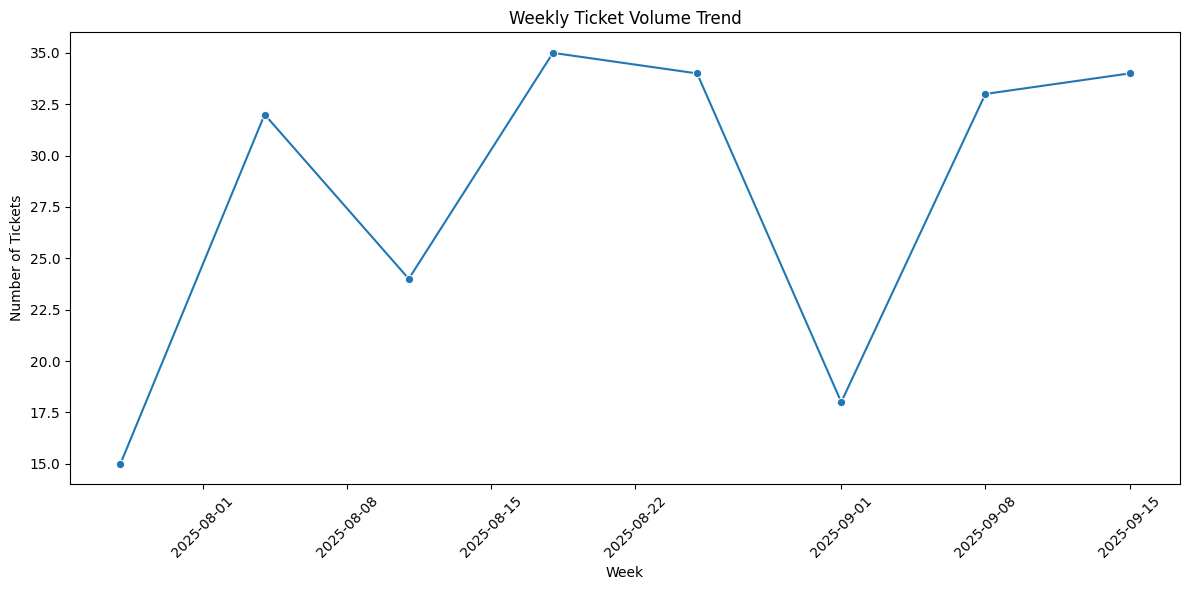

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns


df['Created Date'] = pd.to_datetime(df['Created Date'])
df['Week'] = df['Created Date'].dt.to_period('W').apply(lambda r: r.start_time)

weekly_counts = df.groupby('Week').size().reset_index(name='Tickets')

plt.figure(figsize=(12,6))
sns.lineplot(data=weekly_counts, x='Week', y='Tickets', marker='o')
plt.title('Weekly Ticket Volume Trend')
plt.xlabel('Week')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [30]:
# Total count of tickets per issue
total_per_issue = df['Issue 2 - NPS'].value_counts()

# Total count of tickets per program
total_per_program = df['Program Name'].value_counts()

print("Total tickets per Issue:\n", total_per_issue)
print("\nTotal tickets per Program:\n", total_per_program)


Total tickets per Issue:
 Issue 2 - NPS
Looking For Career Guidance (NPS)                     21
Applied for jobs but no satisfactory outcome (NPS)    19
Time Management Related Concerns (NPS)                18
False Promise By Sales Team (NPS)                     18
Projects & Assignment Related Concern (NPS)           18
Mentor Support Related Concerns (NPS)                 17
Unhappy With The Class Timings (NPS)                  16
TA Support Related Concerns (NPS)                     16
Frequent Resume Rejection (NPS)                       16
Not eligible for placements (NPS)                     14
Instructor Related Feedback (NPS)                     14
Lecture Notes Related (NPS)                           14
Poor Class video quality (NPS)                        14
Unhappy With Course Curriculum (NPS)                  10
Name: count, dtype: int64

Total tickets per Program:
 Program Name
Academy    63
DSML       63
DevOps     52
AIML       47
Name: count, dtype: int64


Proportional Distribution by Program:
 Program Name                                            AIML   Academy  \
Issue 2 - NPS                                                            
Applied for jobs but no satisfactory outcome (NPS)  0.170213  0.095238   
False Promise By Sales Team (NPS)                   0.106383  0.063492   
Frequent Resume Rejection (NPS)                     0.021277  0.063492   
Instructor Related Feedback (NPS)                   0.063830  0.047619   
Lecture Notes Related (NPS)                         0.063830  0.047619   
Looking For Career Guidance (NPS)                   0.106383  0.095238   
Mentor Support Related Concerns (NPS)               0.042553  0.047619   
Not eligible for placements (NPS)                   0.085106  0.047619   
Poor Class video quality (NPS)                      0.021277  0.095238   
Projects & Assignment Related Concern (NPS)         0.021277  0.095238   
TA Support Related Concerns (NPS)                   0.085106  0.111111   

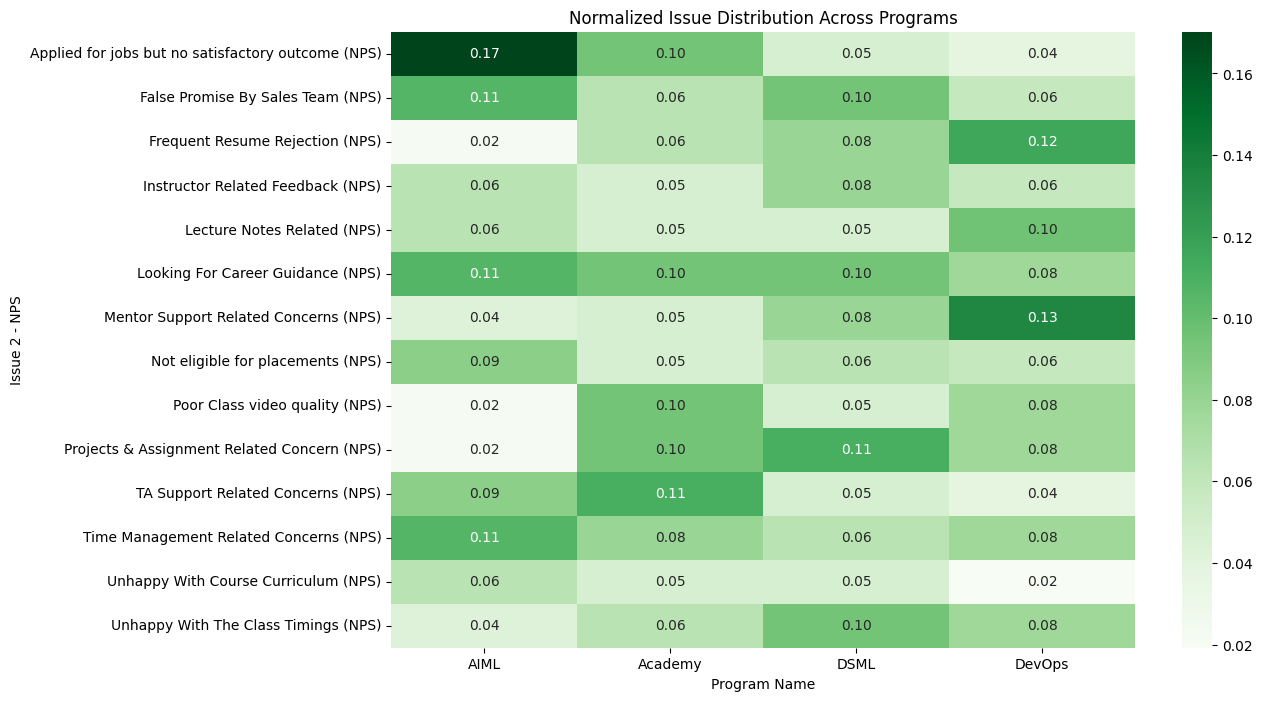

In [32]:
normalized_dist = pd.crosstab(df['Issue 2 - NPS'], df['Program Name'], normalize='columns')
print("Proportional Distribution by Program:\n", normalized_dist)

plt.figure(figsize=(12,8))
sns.heatmap(normalized_dist, annot=True, fmt='.2f', cmap='Greens')
plt.title('Normalized Issue Distribution Across Programs')
plt.xlabel('Program Name')
plt.ylabel('Issue 2 - NPS')
plt.show()


Resolution Time Statistics:
count    158.000000
mean       6.778481
std        3.305320
min        1.000000
25%        4.000000
50%        7.000000
75%        9.750000
max       12.000000
Name: Resolution Time, dtype: float64

Average Resolution Time by Issue:
 Issue 2 - NPS
Lecture Notes Related (NPS)                           5.272727
Unhappy With Course Curriculum (NPS)                  5.500000
Poor Class video quality (NPS)                        6.166667
Applied for jobs but no satisfactory outcome (NPS)    6.214286
Unhappy With The Class Timings (NPS)                  6.272727
TA Support Related Concerns (NPS)                     6.666667
Not eligible for placements (NPS)                     6.888889
Projects & Assignment Related Concern (NPS)           7.000000
False Promise By Sales Team (NPS)                     7.125000
Frequent Resume Rejection (NPS)                       7.300000
Time Management Related Concerns (NPS)                7.461538
Looking For Career Guidance (NP

/tmp/ipython-input-3678413615.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_res_time_by_issue.index, y=avg_res_time_by_issue.values, palette='viridis')


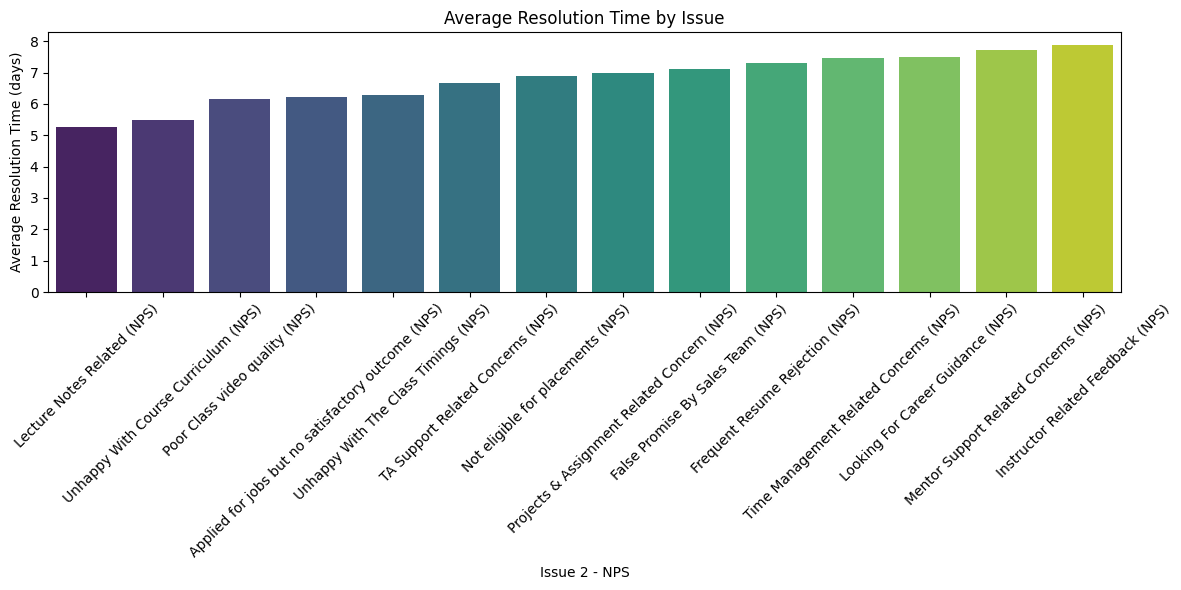

/tmp/ipython-input-3678413615.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Issue 2 - NPS', y='Resolution Time', palette='Set3')


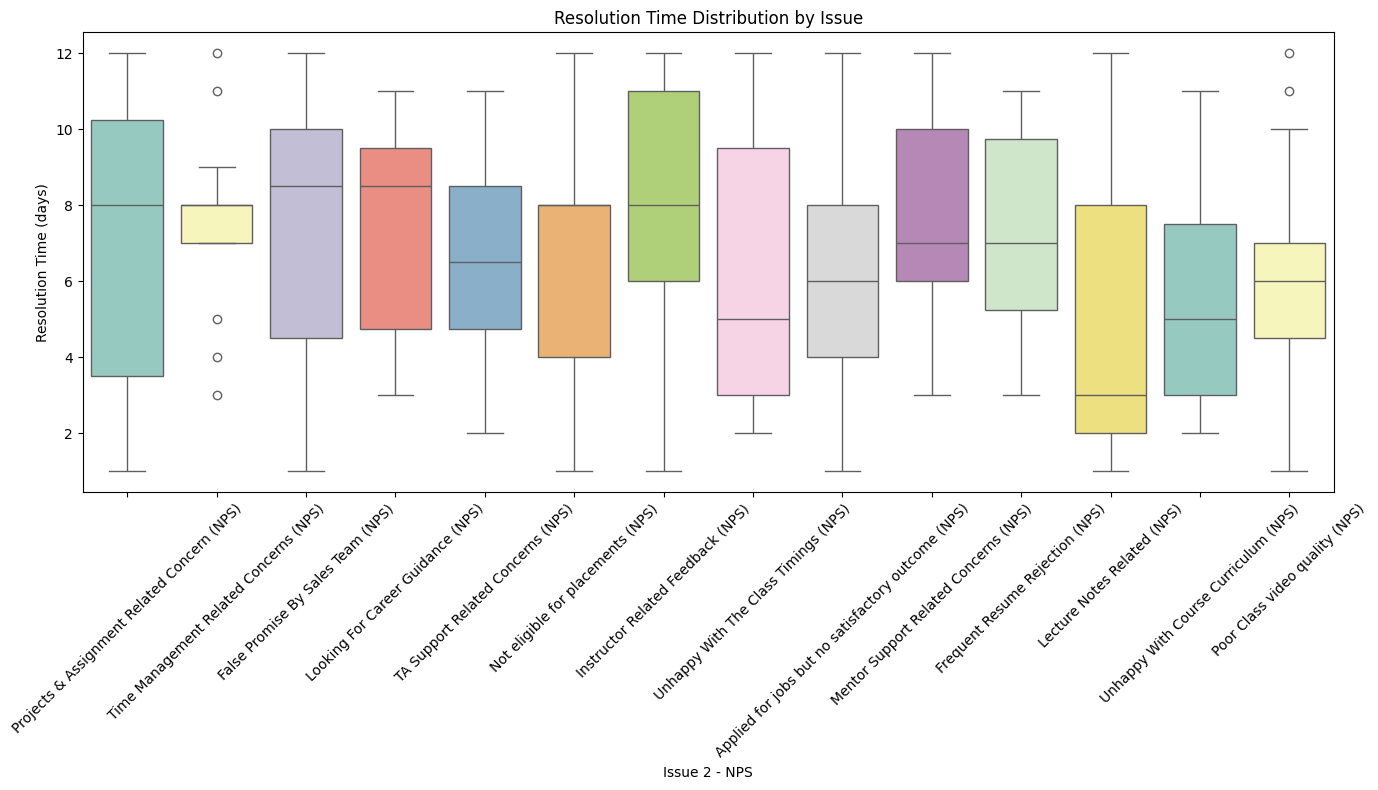

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'Resolution Time' is already calculated

# 1. Print overall statistics
print("Resolution Time Statistics:")
print(df['Resolution Time'].describe())

# 2. Calculate and print average resolution time by issue
avg_res_time_by_issue = df.groupby('Issue 2 - NPS')['Resolution Time'].mean().sort_values()
print("\nAverage Resolution Time by Issue:\n", avg_res_time_by_issue)

# 3. Bar plot of average resolution time by issue
plt.figure(figsize=(12,6))
sns.barplot(x=avg_res_time_by_issue.index, y=avg_res_time_by_issue.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Average Resolution Time by Issue')
plt.xlabel('Issue 2 - NPS')
plt.ylabel('Average Resolution Time (days)')
plt.tight_layout()
plt.show()

# 4. Boxplot to show distribution of resolution times by issue
plt.figure(figsize=(14,8))
sns.boxplot(data=df, x='Issue 2 - NPS', y='Resolution Time', palette='Set3')
plt.xticks(rotation=45)
plt.title('Resolution Time Distribution by Issue')
plt.xlabel('Issue 2 - NPS')
plt.ylabel('Resolution Time (days)')
plt.tight_layout()
plt.show()


In [35]:
print("Team Resolution Time Statistics:")
print(df.groupby('Assigned To')['Resolution Time'].describe())


Team Resolution Time Statistics:
                 count      mean       std  min  25%   50%    75%   max
Assigned To                                                            
Amit Patel        15.0  5.800000  3.629246  1.0  3.0   6.0   8.50  11.0
Carlos Martinez   13.0  6.769231  3.539158  1.0  4.0   7.0  10.00  12.0
David Wilson      13.0  5.923077  3.277742  1.0  3.0   6.0   8.00  10.0
Jessica Kim       31.0  6.612903  3.303306  1.0  4.0   6.0   8.50  12.0
Lisa Rodriguez    17.0  6.823529  3.206152  2.0  5.0   8.0   9.00  12.0
Mike Chen         18.0  7.833333  2.176073  4.0  7.0   7.5   9.75  11.0
Priya Sharma      15.0  4.866667  2.748160  1.0  3.0   4.0   6.00  11.0
Rohit Gupta       14.0  6.000000  3.038218  2.0  3.5   5.5   8.75  12.0
Sarah Johnson     11.0  9.272727  3.379080  2.0  8.5  11.0  11.50  12.0
Sneha Reddy       11.0  8.909091  3.360195  2.0  7.5  11.0  11.00  12.0


/tmp/ipython-input-3008068698.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Assigned To', y='Resolution Time', data=df, palette="Set2")


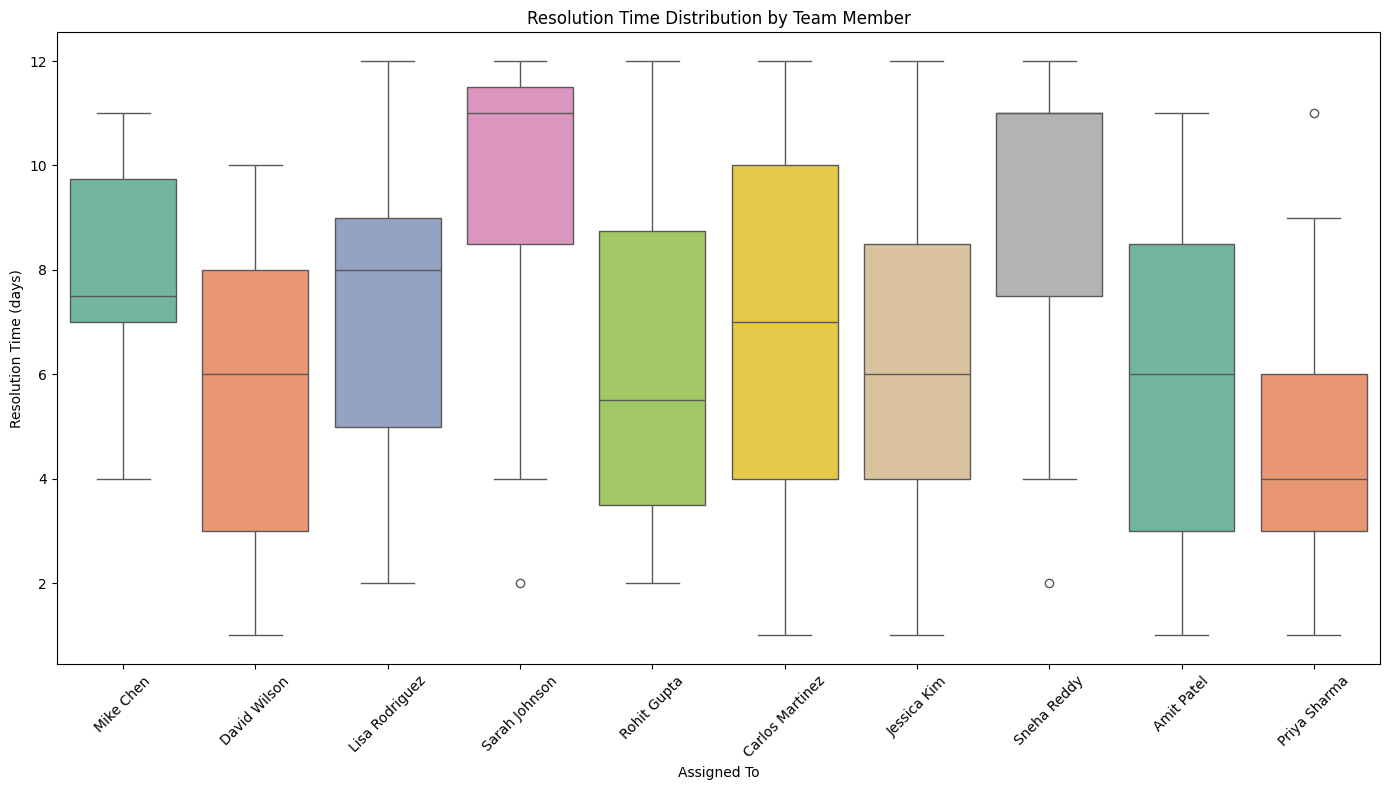

In [37]:
plt.figure(figsize=(14,8))
sns.boxplot(x='Assigned To', y='Resolution Time', data=df, palette="Set2")
plt.title('Resolution Time Distribution by Team Member')
plt.xlabel('Assigned To')
plt.ylabel('Resolution Time (days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-3083890782.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ticket_counts.index, y=ticket_counts.values, palette="viridis")


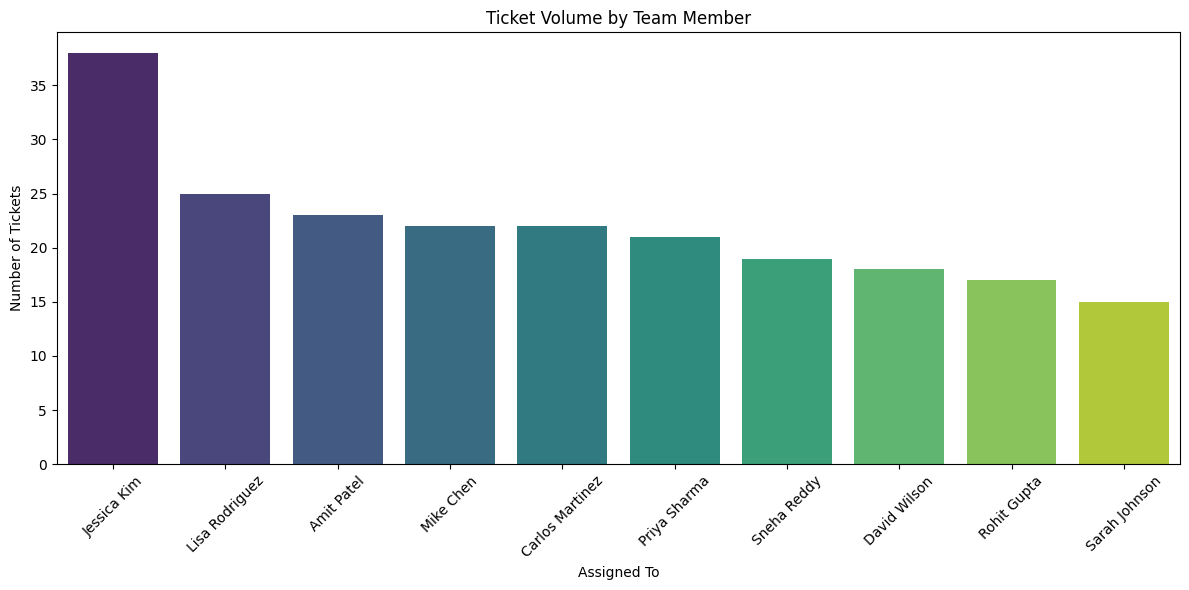

In [38]:
ticket_counts = df['Assigned To'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=ticket_counts.index, y=ticket_counts.values, palette="viridis")
plt.title('Ticket Volume by Team Member')
plt.xlabel('Assigned To')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-3114189802.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_avg_res_time.index, y=team_avg_res_time.values, palette="coolwarm")


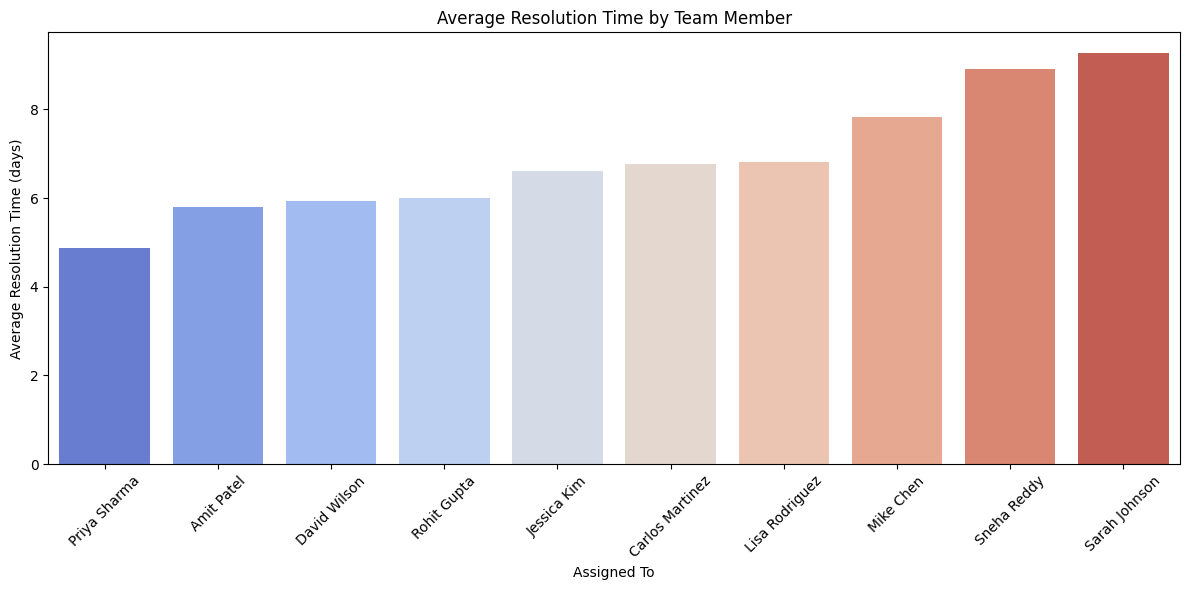

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

team_avg_res_time = df.groupby('Assigned To')['Resolution Time'].mean().sort_values()

plt.figure(figsize=(12,6))
sns.barplot(x=team_avg_res_time.index, y=team_avg_res_time.values, palette="coolwarm")
plt.title('Average Resolution Time by Team Member')
plt.xlabel('Assigned To')
plt.ylabel('Average Resolution Time (days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
